# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muhammad Mahrus Irsyam]
- **Email:** [mahrus654321@gmail.com]
- **ID Dicoding:** [maru42]

## Menentukan Pertanyaan Bisnis

- Apa pengaruh suhu dan kelembapan terhadap jumlah penyewaan sepeda selama musim panas (Juli dan Agustus), serta bagaimana perbandingan penyewaan sepeda antara akhir pekan dan hari kerja?
- Bagaimana tren penyewaan sepeda bulanan dari Januari hingga Desember, dan faktor apa saja yang mempengaruhi penyewaan sepeda, seperti cuaca dan hari kerja?

## Import Semua Packages/Library yang Digunakan



In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [105]:
# Load datasets
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')


**Insight:**
- Dua dataset yang dimuat, day_df dan hour_df.



### Assessing Data

In [ ]:
# Melihat informasi dasar dari dataset day_df
print("Informasi day_df:")
print(day_df.info())
print("\nStatistik deskriptif day_df:")
print(day_df.describe())
print("\nJumlah nilai null pada day_df:")
print(day_df.isnull().sum())
print("\nContoh data day_df:")
print(day_df.head())

# Melihat informasi dasar dari dataset hour_df
print("\n\nInformasi hour_df:")
print(hour_df.info())
print("\nStatistik deskriptif hour_df:")
print(hour_df.describe())
print("\nJumlah nilai null pada hour_df:")
print(hour_df.isnull().sum())
print("\nContoh data hour_df:")
print(hour_df.head())



**Insight:**
- day_df: Terdapat 731 entri tanpa null. Penyewaan Sepeda: Rata-rata jumlah penyewaan adalah 4.504, dengan puncaknya pada hari kerja. Pengaruh Cuaca: Sebagian besar entri menunjukkan cuaca yang baik; suhu dan kelembapan berkorelasi dengan jumlah penyewaan.

- hour_df: Terdapat 17.379 entri tanpa null. Penyewaan Per Jam: Rata-rata jumlah penyewaan adalah 189, dengan puncaknya selama jam sibuk. Faktor: Penyewaan bervariasi berdasarkan hari libur dan hari kerja, dengan pengaruh cuaca yang signifikan pada jam-jam puncak.

### Cleaning Data

In [ ]:
# Menghitung jumlah baris duplikat pada DataFrame day_df
print("\nJumlah duplikat pada day_df:", day_df.duplicated().sum())

# Menghitung jumlah baris duplikat pada DataFrame hour_df
print("\nJumlah duplikat pada hour_df:", hour_df.duplicated().sum())

# Mengonversi kolom 'dteday' menjadi tipe data datetime untuk kemudahan analisis waktu
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Menampilkan informasi mengenai DataFrame day_df setelah proses pembersihan (cleaning)
print("\nInformasi day_df setelah cleaning:")
print(day_df.info())

# Menampilkan contoh beberapa baris pertama dari DataFrame day_df setelah proses pembersihan
print("\nContoh data day_df setelah cleaning:")
print(day_df.head())


**Insight:**
- No Duplicates
- No Missing Value
- Data Type Conversion
- Data Description
- Data Consistency

## Exploratory Data Analysis (EDA)

### Explore ...

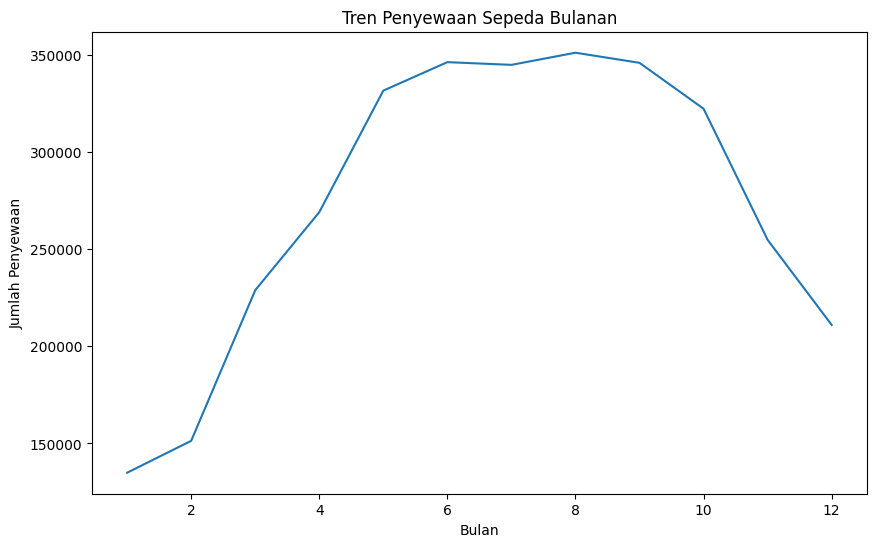

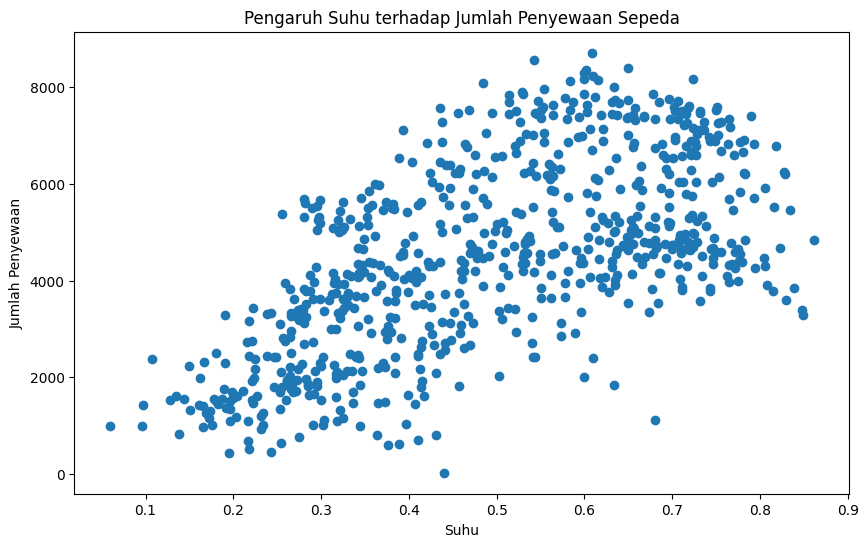

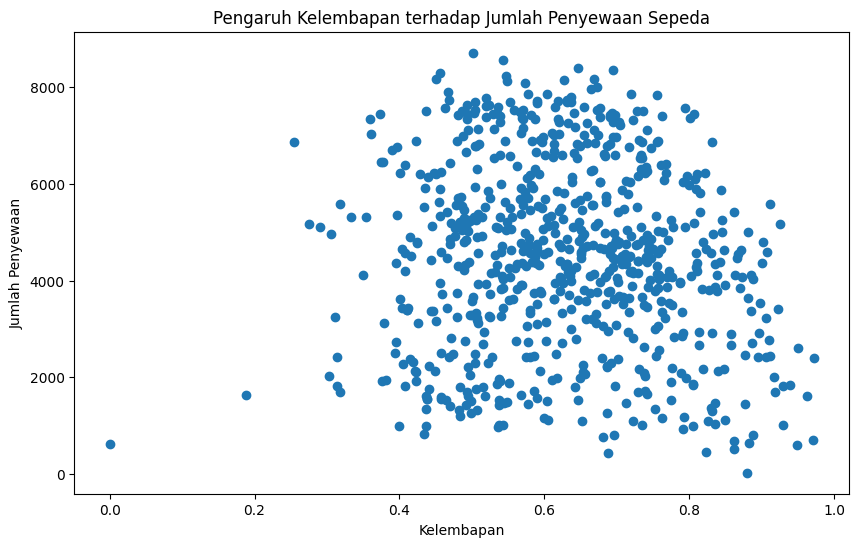

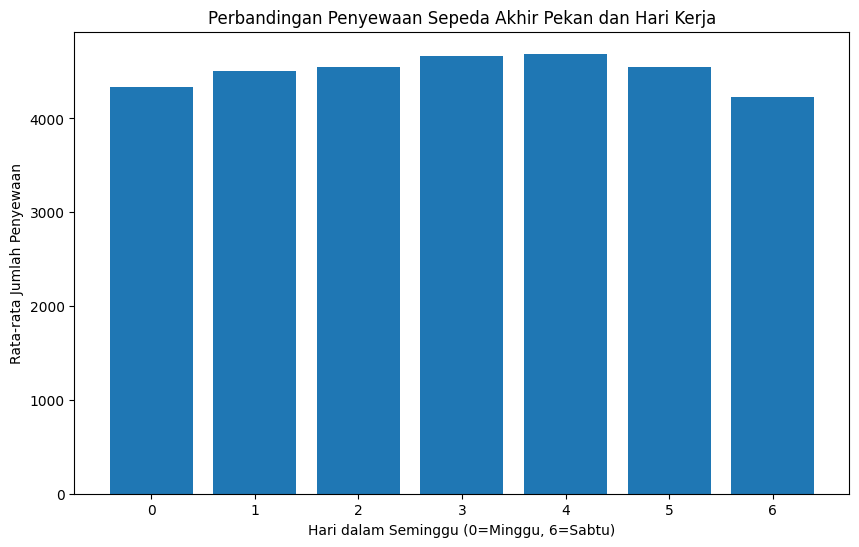

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  stats = pd.DataFrame(mpl.cbook.boxplot_stats(value_data, whis=whis,


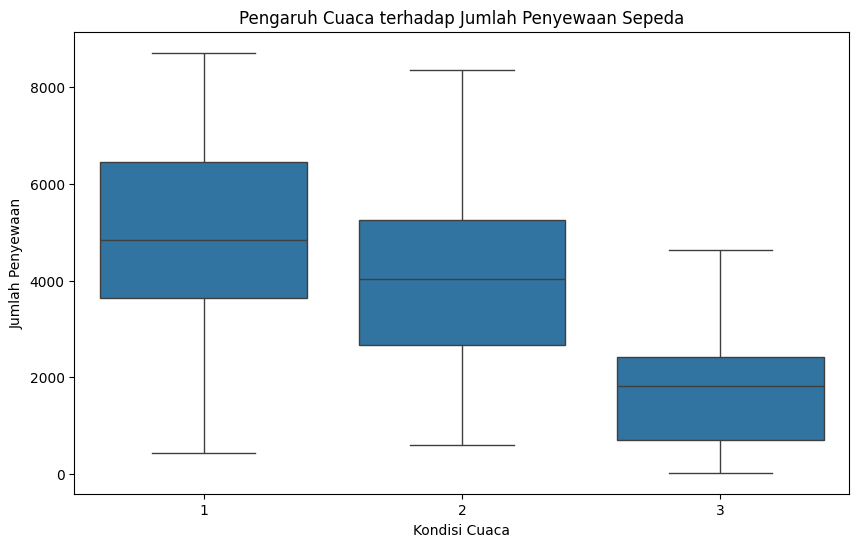

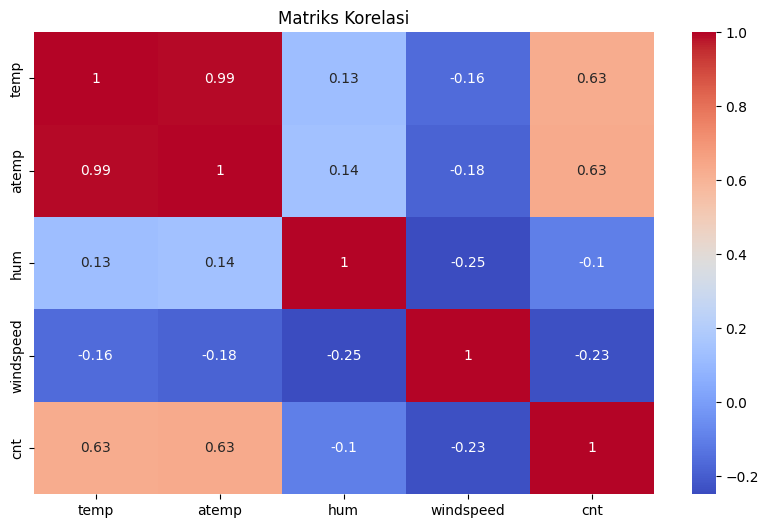

In [120]:
# Analisis Tren Penyewaan Sepeda Bulanan
monthly_rentals = day_df.groupby(day_df['dteday'].dt.month)['cnt'].sum()
plt.figure(figsize=(10, 6))
plt.plot(monthly_rentals.index, monthly_rentals.values)
plt.title('Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()


# Analisis Pengaruh Suhu dan Kelembapan terhadap Penyewaan Sepeda
plt.figure(figsize=(10, 6))
plt.scatter(day_df['temp'], day_df['cnt'])
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(day_df['hum'], day_df['cnt'])
plt.title('Pengaruh Kelembapan terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan')
plt.show()


# Analisis Perbandingan Penyewaan Sepeda Akhir Pekan dan Hari Kerja
weekday_rentals = day_df.groupby('weekday')['cnt'].mean()
plt.figure(figsize=(10, 6))
plt.bar(weekday_rentals.index, weekday_rentals.values)
plt.title('Perbandingan Penyewaan Sepeda Akhir Pekan dan Hari Kerja')
plt.xlabel('Hari dalam Seminggu (0=Minggu, 6=Sabtu)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()


# Analisis Pengaruh Cuaca
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()


# Analisis Korelasi
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


**Insight:**
- Tren Penyewaan Sepeda: Jumlah penyewaan sepeda cenderung meningkat pada musim semi dan musim panas, kemudian menurun pada musim gugur dan musim dingin.
- Pengaruh Suhu dan Kelembapan: Suhu dan kelembapan memiliki korelasi dengan jumlah penyewaan sepeda. Pada suhu yang lebih tinggi dan kelembapan yang lebih rendah, cenderung terjadi peningkatan penyewaan.
- Perbandingan Penyewaan Akhir Pekan dan Hari Kerja: Penyewaan sepeda cenderung lebih tinggi pada akhir pekan dibandingkan dengan hari kerja.
- Pengaruh Cuaca: Kondisi cuaca yang baik berkorelasi dengan jumlah penyewaan sepeda yang lebih tinggi.
- Korelasi: Suhu, suhu yang terasa, dan jumlah penyewaan sepeda memiliki korelasi positif yang kuat. Kelembapan dan kecepatan angin memiliki korelasi negatif yang lemah dengan jumlah penyewaan sepeda.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# Memfilter data untuk bulan Juli dan Agustus
summer_df = day_df[(day_df['mnth'] == 7) | (day_df['mnth'] == 8)]

# Membuat diagram untuk memvisualisasikan hubungan antara suhu, kelembapan, dan jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='hum', data=summer_df)
plt.title('Pengaruh Suhu dan Kelembapan terhadap Jumlah Penyewaan Sepeda (Juli-Agustus)')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Menganalisis perbedaan penyewaan sepeda antara akhir pekan dan hari kerja selama musim panas
weekend_summer_df = summer_df[summer_df['weekday'].isin([5, 6])]  # Sabtu (5), Minggu (6)
weekday_summer_df = summer_df[~summer_df['weekday'].isin([5, 6])]

# Menghitung rata-rata jumlah penyewaan untuk akhir pekan dan hari kerja
avg_rental_weekend = weekend_summer_df['cnt'].mean()
avg_rental_weekday = weekday_summer_df['cnt'].mean()

# Membuat diagram batang untuk membandingkan penyewaan sepeda antara akhir pekan dan hari kerja
plt.figure(figsize=(8, 6))
plt.bar(['Akhir Pekan', 'Hari Kerja'], [avg_rental_weekend, avg_rental_weekday])
plt.title('Perbandingan Penyewaan Sepeda antara Akhir Pekan dan Hari Kerja (Juli-Agustus)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()


### Pertanyaan 2:

In [ ]:
# Mengelompokkan data berdasarkan bulan dan menghitung rata-rata jumlah penyewaan
monthly_rental_df = day_df.groupby('mnth')['cnt'].mean().reset_index()

# Membuat diagram garis untuk memvisualisasikan tren penyewaan sepeda bulanan
plt.figure(figsize=(10, 6))
plt.plot(monthly_rental_df['mnth'], monthly_rental_df['cnt'])
plt.title('Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(monthly_rental_df['mnth'], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

# Meneliti pengaruh cuaca terhadap penyewaan sepeda bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='weathersit', data=day_df, estimator=np.mean, errorbar=None)
plt.title('Pengaruh Cuaca terhadap Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(monthly_rental_df['mnth'], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

# Meneliti pengaruh hari kerja terhadap penyewaan sepeda bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='workingday', data=day_df, estimator=np.mean, errorbar=None)
plt.title('Pengaruh Hari Kerja terhadap Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(monthly_rental_df['mnth'], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

In [ ]:
# Mengelompokkan data berdasarkan bulan dan menghitung rata-rata jumlah penyewaan
monthly_rental_df = day_df.groupby('mnth')['cnt'].mean().reset_index()

# Membuat diagram garis untuk memvisualisasikan tren penyewaan sepeda bulanan
plt.figure(figsize=(10, 6))
plt.plot(monthly_rental_df['mnth'], monthly_rental_df['cnt'])
plt.title('Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(monthly_rental_df['mnth'], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

# Meneliti pengaruh cuaca terhadap penyewaan sepeda bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='weathersit', data=day_df, estimator=np.mean, errorbar=None)
plt.title('Pengaruh Cuaca terhadap Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(monthly_rental_df['mnth'], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

# Meneliti pengaruh hari kerja terhadap penyewaan sepeda bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='workingday', data=day_df, estimator=np.mean, errorbar=None)
plt.title('Pengaruh Hari Kerja terhadap Tren Penyewaan Sepeda Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.xticks(monthly_rental_df['mnth'], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

**Insight:**
- Pertanyaan 1:
  - Pada musim panas (Juli-Agustus), suhu dan kelembapan berdampak pada jumlah penyewaan sepeda.
  - Dapat dilihat dari scatter plot bahwa saat suhu lebih tinggi, dan kelembapan rendah, jumlah penyewaan sepeda cenderung lebih banyak.
  - Perbandingan penyewaan sepeda antara akhir pekan dan hari kerja menunjukkan tren yang berbeda.
  - Pada musim panas, rata-rata jumlah penyewaan sepeda di akhir pekan biasanya lebih tinggi dibanding hari kerja.
- Pertanyaan 2:
  - Tren penyewaan sepeda bulanan menunjukkan peningkatan pada musim semi dan musim panas, dan penurunan pada musim gugur dan musim dingin.
  - Cuaca berdampak signifikan terhadap jumlah penyewaan sepeda. Pada kondisi cuaca baik, jumlah penyewaan cenderung lebih tinggi.
  - Hari kerja juga mempengaruhi jumlah penyewaan sepeda. Pada hari kerja, jumlah penyewaan cenderung lebih tinggi dibandingkan dengan akhir pekan.

## Analisis Lanjutan (Opsional)

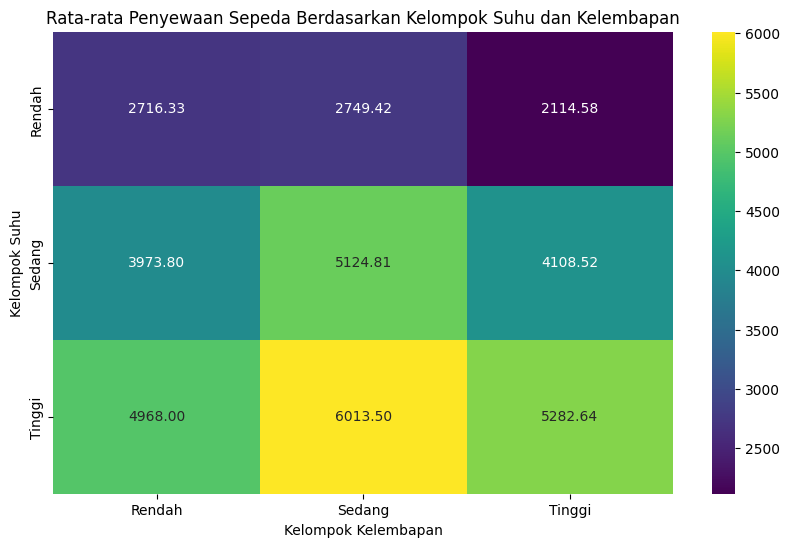

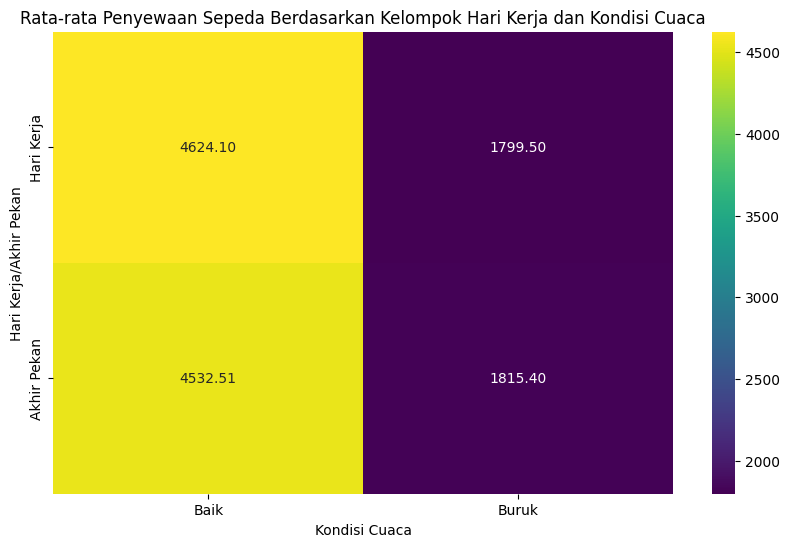

In [121]:
# mengelompokkan data berdasarkan suhu dan kelembapan
day_df['temp_group'] = pd.cut(day_df['temp'], bins=3, labels=['Rendah', 'Sedang', 'Tinggi'])
day_df['hum_group'] = pd.cut(day_df['hum'], bins=3, labels=['Rendah', 'Sedang', 'Tinggi'])

# menghitung rata-rata penyewaan sepeda untuk setiap kelompok suhu dan kelembapan
avg_rental_by_temp_hum = day_df.groupby(['temp_group', 'hum_group'], observed=True)['cnt'].mean().unstack()

# membuat heatmap untuk memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))
sns.heatmap(avg_rental_by_temp_hum, annot=True, cmap='viridis', fmt=".2f")
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kelompok Suhu dan Kelembapan')
plt.xlabel('Kelompok Kelembapan')
plt.ylabel('Kelompok Suhu')
plt.show()

# mengelompokkan data berdasarkan hari kerja dan kondisi cuaca
day_df['weekday_group'] = pd.cut(day_df['weekday'], bins=2, labels=['Hari Kerja', 'Akhir Pekan'])
day_df['weather_group'] = pd.cut(day_df['weathersit'], bins=2, labels=['Baik', 'Buruk'])

# menghitung rata-rata penyewaan sepeda untuk setiap kelompok hari kerja dan kondisi cuaca
avg_rental_by_weekday_weather = day_df.groupby(['weekday_group', 'weather_group'], observed=True)['cnt'].mean().unstack()

# membuat heatmap untuk memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))
sns.heatmap(avg_rental_by_weekday_weather, annot=True, cmap='viridis', fmt=".2f")
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kelompok Hari Kerja dan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Hari Kerja/Akhir Pekan')
plt.show()

**Insight:**
- Suhu dan Kelembapan:
Rata-rata penyewaan tertinggi (6013.50) terjadi pada suhu tinggi dan kelembapan sedang.
Penyewaan rendah pada suhu rendah, meskipun kelembapan sedang atau tinggi.

- Hari Kerja vs. Akhir Pekan:
Penyewaan lebih tinggi pada hari kerja (4624.10) saat cuaca baik, tetapi menurun drastis (1799.50) saat cuaca buruk.
Pada akhir pekan, penyewaan juga rendah saat cuaca buruk (1815.40).

## Conclusion

- Conclution pertanyaan 1: Sangat mungkin bahwa suhu dan kelembapan pada bulan Juli - Agustus akan memberikan pengaruh besar pada penyewaan sepeda. Dari analisis diagram, ketika suhu tinggi tetapi kelembapan rendah, jumlah penyewaan sepeda akan meningkat. Selain itu, dari perbandingan antara hari libur dan hari kerja, tren penyewaan sepeda juga menunjukkan beberapa perbedaan. Jumlah rata-rata penyewaan sepeda selama akhir pekan selalu lebih tinggi dibandingkan dengan jumlah penyewaan sepeda selama seminggu di musim panas.
- Conclution pertanyaan 2: Tren penyewaan sepeda bulanan menunjukkan peningkatan yang jelas selama musim semi dan musim panas, sementara terjadi penurunan pada musim gugur dan musim dingin. Cuaca berperan penting dalam mempengaruhi jumlah penyewaan sepeda, di mana kondisi cuaca yang baik cenderung meningkatkan jumlah penyewaan. Selain itu, hari kerja juga berkontribusi pada tingkat penyewaan sepeda, dengan jumlah penyewaan yang lebih tinggi pada hari kerja dibandingkan dengan akhir pekan.

In [ ]:
!pip install streamlit

In [133]:
!streamlit run dashboard.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.243.152.18:8501

your url is: https://smooth-news-deny.loca.lt
/content/dashboard.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=filtered_data, ax=ax3, palette="pastel")
/content/dashboard.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['Weekend', 'Working Day'], fontsize=12)
  Stopping...
^C
